## Import Library yang digunakan

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LassoCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['jumlah_promosi'] = train_target

In [3]:
hasil['jumlah_promosi'].value_counts()

0    1229
5     580
4     511
3     460
1     395
6     340
2     303
Name: jumlah_promosi, dtype: int64

## Data Preprocessing ¶

In [3]:
train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


In [4]:
test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

dari menggunakan fungsi info kita bisa mendapatkan informasi:
1. 14 kolom numerik dan 3 kolom objek untuk train dan tambahan ID untuk test
2. Beberapa kolom memilki nilai null 

In [7]:
train.describe()

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
count,3817.000000,3.627000e+03,3627.000000,3613.000000,3645.000000,3636.000000,3.639000e+03,3624.000000,3603.000000,3639.000000,3652.000000,3648.000000,3621.000000,3817.000000
mean,1967.823946,1.144832e+08,0.293080,0.353723,47.231550,59804.239824,4.385748e+05,81428.997792,63377.970580,2.125584,4.436473,5.767818,0.004971,2.585800
std,11.768131,4.346042e+07,0.473063,0.493014,27.068512,74024.976109,5.120427e+05,99976.226855,79435.457282,2.100133,3.002522,3.210738,0.070340,2.101845
min,1899.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,8.112512e+07,0.000000,0.000000,25.000000,7907.000000,4.947950e+04,10115.000000,7947.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,1968.000000,1.156214e+08,0.000000,0.000000,47.000000,26456.000000,2.219930e+05,36054.500000,27795.000000,2.000000,4.000000,5.000000,0.000000,3.000000
75%,1976.000000,1.504960e+08,1.000000,1.000000,69.000000,86162.000000,6.863555e+05,121380.000000,89502.500000,3.000000,7.000000,8.000000,0.000000,4.000000
max,2000.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000,6.000000


In [8]:
test.describe()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
count,3818.000000,3818.000000,3.615000e+03,3609.000000,3608.000000,3617.000000,3632.000000,3.623000e+03,3622.000000,3631.000000,3639.000000,3638.000000,3632.000000,3625.000000
mean,3841.507072,1967.789942,1.163249e+08,0.282904,0.355322,47.181366,61234.083425,4.528484e+05,85338.612093,63801.505921,2.101676,4.465091,5.835628,0.002759
std,2198.401006,11.808572,5.105122e+07,0.465005,0.496865,26.940287,76647.590617,5.123206e+05,103789.546199,78428.544713,2.115571,2.935615,3.288349,0.052457
min,2.000000,1892.000000,2.998899e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1950.750000,1959.000000,8.168162e+07,0.000000,0.000000,25.000000,7497.500000,5.462100e+04,10115.000000,8092.000000,0.000000,2.000000,3.000000,0.000000
50%,3872.500000,1968.000000,1.177321e+08,0.000000,0.000000,46.000000,29525.000000,2.327530e+05,40025.500000,29251.000000,2.000000,4.000000,5.000000,0.000000
75%,5770.750000,1976.000000,1.506877e+08,1.000000,1.000000,68.000000,86776.750000,7.217960e+05,129656.750000,91407.000000,3.000000,6.000000,8.000000,0.000000
max,7634.000000,2009.000000,1.305740e+09,2.000000,2.000000,133.000000,408646.000000,3.271191e+06,574932.000000,532049.000000,17.000000,27.000000,17.000000,1.000000


Berdasarkan fungsi describe didapatkan beberapa hal penting berupa : 
1. Jumlah total entri dalam dataset adalah 3818.
2. Terdapat beberapa kolom dengan jumlah entri yang berbeda, menunjukkan adanya nilai yang hilang dalam beberapa kolom.
3. Data numerik memiliki statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum.

Selanjutnya dapat dilakukan dengan menganalisis dan mengatasi data yang bersifat NULL

### Mengecek data null

In [9]:
for i in train.columns:
    print("Kolom " + i + " berisi:\n")
    print(train[i].value_counts())

Kolom tahun_kelahiran berisi:

1968    140
1970    137
1969    134
1972    130
1973    125
       ... 
1998      1
1916      1
1912      1
1925      1
1908      1
Name: tahun_kelahiran, Length: 76, dtype: int64
Kolom pendidikan berisi:

Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: pendidikan, dtype: int64
Kolom status_pernikahan berisi:

Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
5                     1
Name: status_pernikahan, dtype: int64
Kolom pendapatan berisi:

58555000.0     2
98033000.0     2
100016000.0    2
102971000.0    2
147845000.0    2
              ..
75153084.0     1
43279588.0     1
263538206.0    1
112547078.0    1
130512000.0    1
Name: pendapatan, Length: 3622, dtype: int64
Kolom jumlah_anak_balita berisi:

0.0    2594
1.0    1003
2.0      30
Name: jumlah_anak_balita, dtype: int64
Kolom jumlah_anak_remaja berisi:

0.0    2361
1.

In [10]:
for i in train.columns:
  print(f'{i}: {train[i].isna().sum()/len(train)*100}%')

tahun_kelahiran: 0.0%
pendidikan: 4.951532617238669%
status_pernikahan: 5.554100078595756%
pendapatan: 4.977731202515065%
jumlah_anak_balita: 4.977731202515065%
jumlah_anak_remaja: 5.344511396384595%
terakhir_belanja: 4.506156667539953%
belanja_buah: 4.741943935027509%
belanja_daging: 4.663348179198323%
belanja_ikan: 5.05632695834425%
belanja_kue: 5.606497249148546%
pembelian_diskon: 4.663348179198323%
pembelian_web: 4.322766570605188%
pembelian_toko: 4.427560911710768%
keluhan: 5.134922714173435%
tanggal_menjadi_anggota: 72.09850668063925%
jumlah_promosi: 0.0%


In [11]:
for i in test.columns:
    print("Kolom " + i + " berisi:\n")
    print(test[i].value_counts())

Kolom ID berisi:

2241    1
3074    1
3530    1
3034    1
5408    1
       ..
3277    1
6238    1
3924    1
3704    1
2151    1
Name: ID, Length: 3818, dtype: int64
Kolom tahun_kelahiran berisi:

1972    149
1968    142
1974    130
1967    130
1970    122
       ... 
1938      1
1904      1
1933      1
1902      1
1920      1
Name: tahun_kelahiran, Length: 85, dtype: int64
Kolom pendidikan berisi:

Sarjana     1935
Magister     803
SMA          408
Doktor       404
SMP           62
5              2
Name: pendidikan, dtype: int64
Kolom status_pernikahan berisi:

Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
5                     1
Name: status_pernikahan, dtype: int64
Kolom pendapatan berisi:

147845000.0    4
50160000.0     2
131453000.0    2
120660151.0    1
109476136.0    1
              ..
73758468.0     1
124983763.0    1
131454231.0    1
148745004.0    1
140353000.0    1
Name: pendapatan, Length: 3610, dtype

In [12]:
for i in test.columns:
  print(f'{i}: {test[i].isna().sum()/len(test)*100}%')

ID: 0.0%
tahun_kelahiran: 0.0%
pendidikan: 5.34311157674175%
status_pernikahan: 4.766893661602934%
pendapatan: 5.316919853326349%
jumlah_anak_balita: 5.474070193818753%
jumlah_anak_remaja: 5.500261917234154%
terakhir_belanja: 5.264536406495547%
belanja_buah: 4.871660555264536%
belanja_daging: 5.107386066003143%
belanja_ikan: 5.133577789418544%
belanja_kue: 4.897852278679937%
pembelian_diskon: 4.688318491356731%
pembelian_web: 4.714510214772132%
pembelian_toko: 4.871660555264536%
keluhan: 5.055002619172341%
tanggal_menjadi_anggota: 72.26296490309062%


1. kolom tanggal_menjadi_anggota memiliki null value sangat banyak dan juga merupakan sebuah tanggal jadi akan kita drop
2. Terdapat beberapa data yang outlier seperti Angka 5 pada beberapa atribut yang seharusnya tidak ada

In [13]:
train = train.drop(columns=['tanggal_menjadi_anggota'])
test = test.drop(columns=['tanggal_menjadi_anggota'])

Selanjutnya, mengecek distribusi dari kategorikal variable, yaitu pendidikan dan status_pernikahan

In [14]:
# check unique value on object columns
for i in train.columns:
  if train[i].dtypes == 'object':
    print(f'{i}: {train[i].unique()}')

# check unique value on object columns
for i in test.columns:
  if test[i].dtypes == 'object':
    print(f'{i}: {test[i].unique()}')

pendidikan: ['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' nan '5']
status_pernikahan: ['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' nan 'Cerai Mati' '5']
pendidikan: ['Sarjana' 'Doktor' 'SMA' 'Magister' nan 'SMP' '5']
status_pernikahan: [nan 'Menikah' 'Rencana Menikah' 'Sendiri' 'Cerai Mati' 'Cerai' '5']


In [15]:
# check unique value on object columns
for i in train.columns:
  if train[i].dtypes == 'object':
    print(f'{i}: \n{train[i].value_counts()}')

# check unique value on object columns
for i in test.columns:
  if test[i].dtypes == 'object':
    print(f'{i}: \n{test[i].value_counts()}')

pendidikan: 
Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: pendidikan, dtype: int64
status_pernikahan: 
Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
5                     1
Name: status_pernikahan, dtype: int64
pendidikan: 
Sarjana     1935
Magister     803
SMA          408
Doktor       404
SMP           62
5              2
Name: pendidikan, dtype: int64
status_pernikahan: 
Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
5                     1
Name: status_pernikahan, dtype: int64


dapat dilihat bahwa ada nilai 5 yang tidak valid, maka akan kita replace dengan null untuk dapat memudahkan analisis

In [16]:
# change value 5 in pendidikan and status pernikahan into nan
train['pendidikan'] = train['pendidikan'].replace('5', None)
test['pendidikan'] = test['pendidikan'].replace('5', None)
train['status_pernikahan'] = train['status_pernikahan'].replace('5', None)
test['status_pernikahan'] = test['status_pernikahan'].replace('5', None)

selanjutnya kita akan drop jumlah_promosi karena sudah disimpan di train_target dan ID karena hanya unique identifier

In [17]:
# drop colums target
train = train.drop(columns=['jumlah_promosi'])

In [18]:
test.drop(columns='ID', inplace=True)
test.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
0,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0
1,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0
2,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0
3,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0
4,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0


## Imputation Null value

disini akan dibagi menjadi 2, yaitu imputasi regressi untuk fitur numerik dan juga imputasi klasifikasi untuk kategorikal

In [19]:
def feature_imputation(X: pd.DataFrame, categorical_features: list, test: bool = False, imputer_reg=None, imputer_clf=None) -> pd.DataFrame:
    """Apply separate iterative imputation to numerical and categorical features in a DataFrame."""
    X_num = X.drop(columns=categorical_features)
    X_cat = X[categorical_features]

    if not test:
        # Define imputers if they're not already initialized
        if imputer_reg is None:
            imputer_reg = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, random_state=42)
        if imputer_clf is None:
            imputer_clf = IterativeImputer(estimator=DecisionTreeClassifier(), max_iter=10, random_state=42)
        
        # Fit and transform for numerical data
        imputed_num = imputer_reg.fit_transform(X_num)
        # Fit and transform for categorical data
        imputed_cat = imputer_clf.fit_transform(X_cat)
    else:
        # Check if imputers have been fitted
        if imputer_reg is None or imputer_clf is None:
            raise ValueError("Imputers must be fitted before transforming test data.")
        # Only transform for numerical data
        imputed_num = imputer_reg.transform(X_num)
        # Only transform for categorical data
        imputed_cat = imputer_clf.transform(X_cat)
    
    # Convert numpy arrays back to DataFrames
    df_num = pd.DataFrame(imputed_num, columns=X_num.columns)
    df_cat = pd.DataFrame(imputed_cat, columns=X_cat.columns)
    
    # Combine numerical and categorical data back into a single DataFrame
    df = pd.concat([df_num, df_cat], axis=1)
    
    return df

## Label Encoding

Karena ada data kategorikal dimana perlu diubah menjadi numerik terlebih dahulu, disini akan manual dilakukan dengan mapping, karena bila menggunakan label encoder akan sedikit terganggu karena label encoder akan meng-encode pula null value

In [20]:
def manual_label_encoding(X: pd.DataFrame, test: bool = False) -> pd.DataFrame:
    """Apply manual label encoding to specified columns."""
    # Mapping for 'pendidikan'
    pendidikan_mapping = {'SMP': 0, 'SMA': 1, 'Sarjana': 2, 'Magister': 3, 'Doktor': 4}
    # Mapping for 'status_pernikahan'
    status_pernikahan_mapping = {'Sendiri': 0, 'Rencana Menikah': 1, 'Menikah': 2, 'Cerai': 3, 'Cerai Mati': 4}
    X['pendidikan'] = X['pendidikan'].map(pendidikan_mapping)
    X['status_pernikahan'] = X['status_pernikahan'].map(status_pernikahan_mapping)

    return X

## One hot encoding
Setelah itu akan dilakukan one hot encoding, untuk membuat fitur kategory menjadi binary, untuk kasus itu yaitu pendapatan_qcut yang merupakan bagian dari feature creation dan status pernikahan, untuk pendidikan dia dianggap sebagai ordinal encoding

In [21]:
def one_hot_encoding(X: pd.DataFrame, test: bool = False) -> pd.DataFrame:
    """Apply one-hot encoding to some columns."""
    col_to_encode = ['status_pernikahan', 'pendapatan_qcut']
    if not test:
        X = pd.get_dummies(X, columns=col_to_encode)
    else:  
        for col in col_to_encode:
            X = pd.get_dummies(X, columns=[col])
    return X

# Exploratory Data Analysis

Selanjutnya untuk dapat meningkatkan analisis serta menemukan pola dan korelasi yang terdapat pada Dataset, dapat dilakukan Exploratory Data Analysis yang nantinya dapat dilakukan anlisis guna membuat feature creation

{'tahun_kelahiran': [], 'pendapatan': ['belanja_daging'], 'jumlah_anak_balita': [], 'jumlah_anak_remaja': [], 'terakhir_belanja': [], 'belanja_buah': [], 'belanja_daging': ['pendapatan'], 'belanja_ikan': [], 'belanja_kue': [], 'pembelian_diskon': [], 'pembelian_web': [], 'pembelian_toko': [], 'keluhan': []}


{'tahun_kelahiran': [], 'pendapatan': [], 'jumlah_anak_balita': [], 'jumlah_anak_remaja': [], 'terakhir_belanja': [], 'belanja_buah': [], 'belanja_daging': [], 'belanja_ikan': [], 'belanja_kue': [], 'pembelian_diskon': [], 'pembelian_web': [], 'pembelian_toko': [], 'keluhan': []}


<AxesSubplot:>

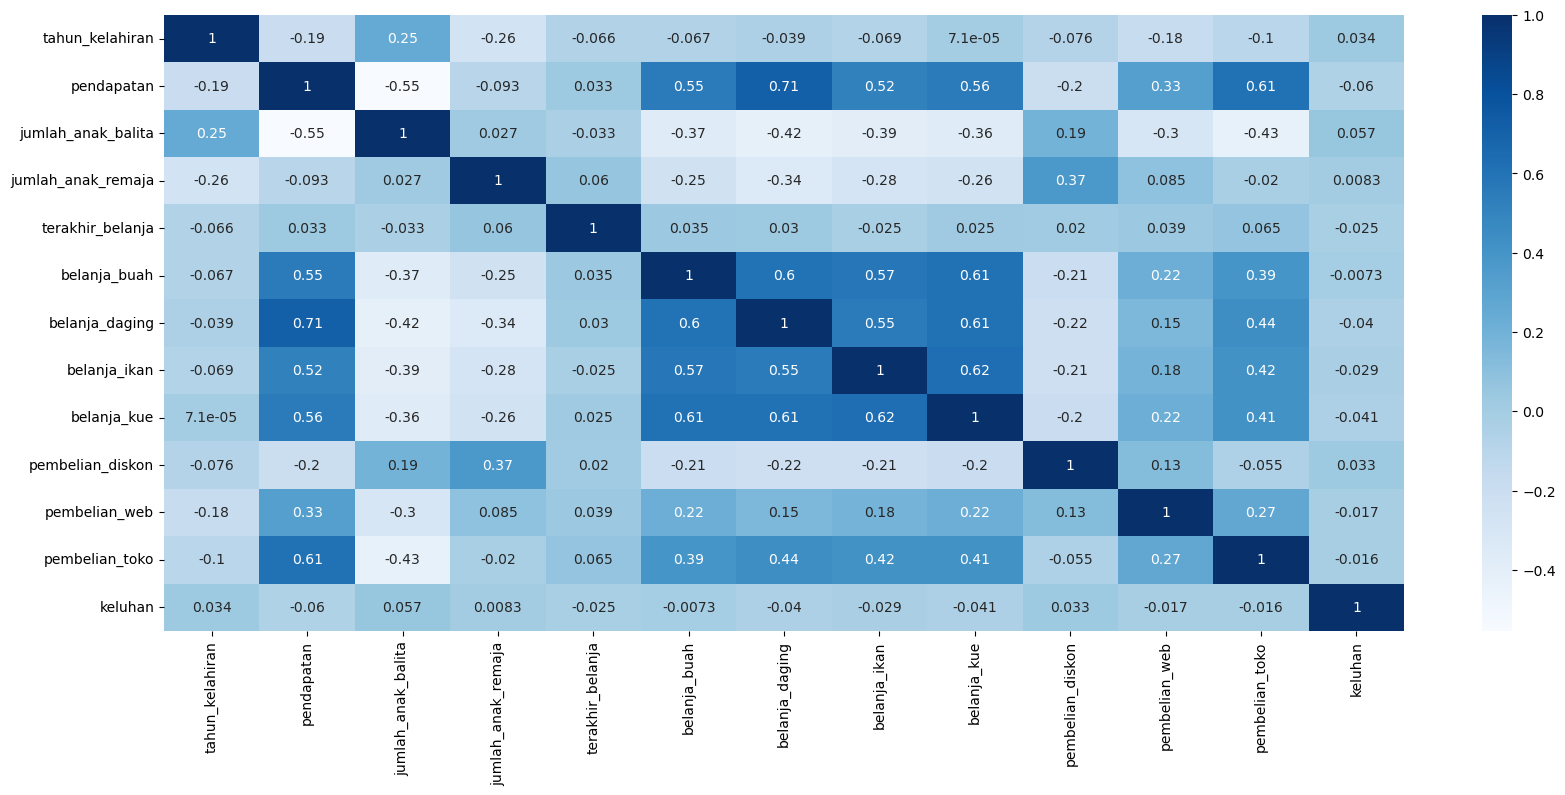

In [25]:
#correlations between features using seaborn heatmap
corr = train.select_dtypes(include = ["int64","float64"]).corr()
plt.figure(figsize=(20,8))
var = corr.columns
n = len(var)
pos = dict()
neg = dict()
for i in var:
    pos[i] = list()
    neg[i] = list()

for i in var:
    for j in range(n):
        if i == var[j]: continue
        if corr[i].iloc[j] > 0.7:
            pos[i].append(var[j])
        if corr[i].iloc[j] < -0.7:
            neg[i].append(var[j])

print(pos)
print("\n")
print(neg)
            
sns.heatmap(corr, cmap="Blues",annot=True)

{'tahun_kelahiran': [], 'pendapatan': [], 'jumlah_anak_balita': [], 'jumlah_anak_remaja': [], 'terakhir_belanja': [], 'belanja_buah': [], 'belanja_daging': [], 'belanja_ikan': [], 'belanja_kue': [], 'pembelian_diskon': [], 'pembelian_web': [], 'pembelian_toko': [], 'keluhan': []}


{'tahun_kelahiran': [], 'pendapatan': [], 'jumlah_anak_balita': [], 'jumlah_anak_remaja': [], 'terakhir_belanja': [], 'belanja_buah': [], 'belanja_daging': [], 'belanja_ikan': [], 'belanja_kue': [], 'pembelian_diskon': [], 'pembelian_web': [], 'pembelian_toko': [], 'keluhan': []}


<AxesSubplot:>

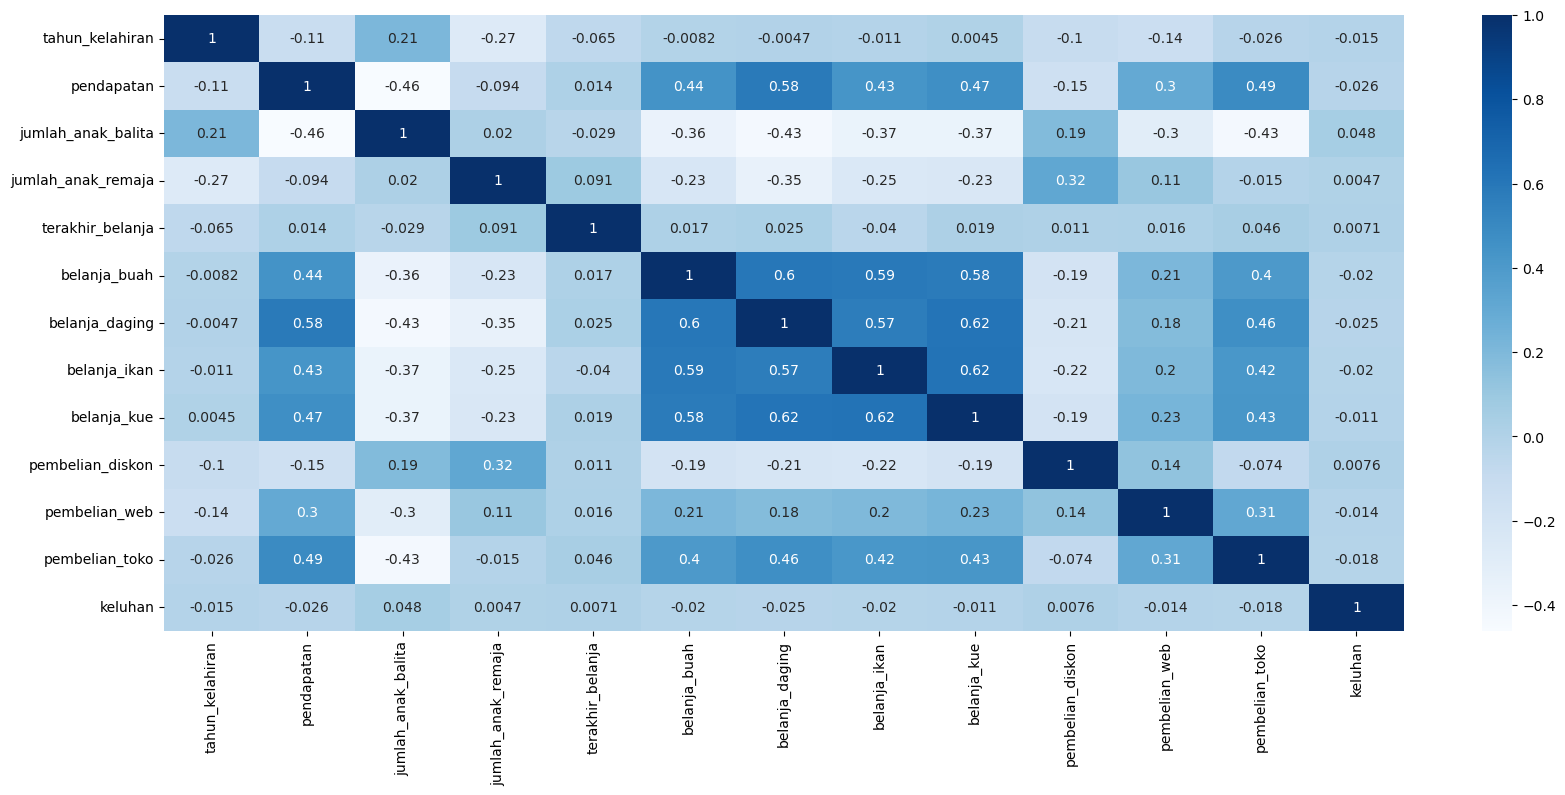

In [30]:
#correlations between features using seaborn heatmap
corr = test.select_dtypes(include = ["int64","float64"]).corr()
plt.figure(figsize=(20,8))
var = corr.columns
n = len(var)
pos = dict()
neg = dict()
for i in var:
    pos[i] = list()
    neg[i] = list()

for i in var:
    for j in range(n):
        if i == var[j]: continue
        if corr[i].iloc[j] > 0.7:
            pos[i].append(var[j])
        if corr[i].iloc[j] < -0.7:
            neg[i].append(var[j])

print(pos)
print("\n")
print(neg)
            
sns.heatmap(corr, cmap="Blues",annot=True)

Berdasarkan analisis heatmap yang telah dibuat, terdapat beberapa atribut yang menunjukkan korelasi yang cukup tinggi, terutama kolom-kolom belanja seperti buah, daging, ikan, dan diskon yang memiliki korelasi positif yang signifikan dengan pendapatan. Hal ini mengindikasikan bahwa biaya belanja untuk setiap kategori memiliki hubungan positif dengan tingkat pendapatan. Dengan demikian, kita dapat membuat sebuah fitur baru yang merupakan total biaya belanja dari seluruh kategori, yang bisa disebut sebagai Total Spend.

<AxesSubplot:ylabel='status_pernikahan'>

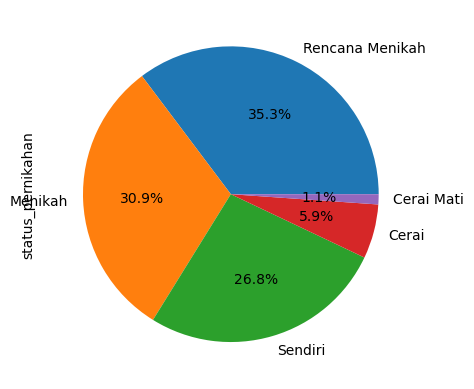

In [32]:
counts = train['status_pernikahan'].value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')

<AxesSubplot:ylabel='Frequency'>

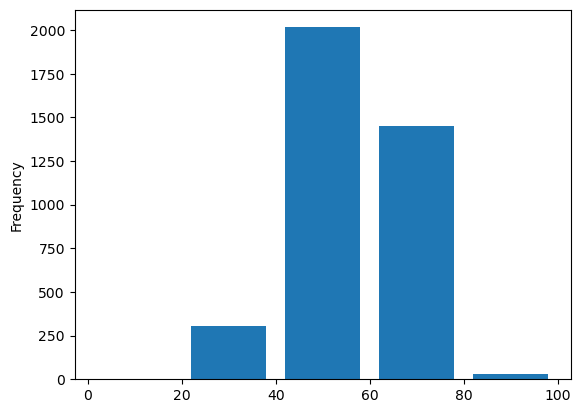

In [4]:
(train.loc[:, "tahun_kelahiran"].apply(lambda x: 2024 - x)).plot(kind="hist", bins=[0, 20, 40, 60, 80, 100], rwidth=0.8)

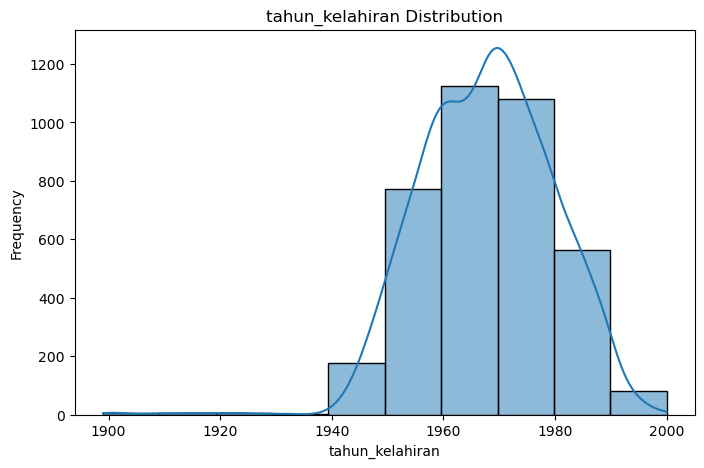

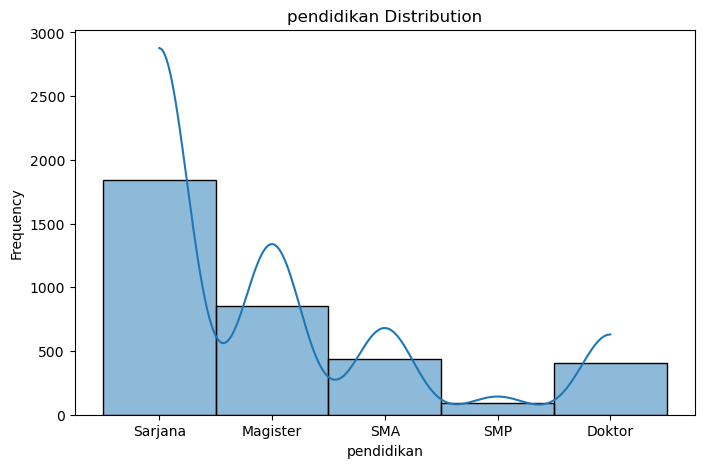

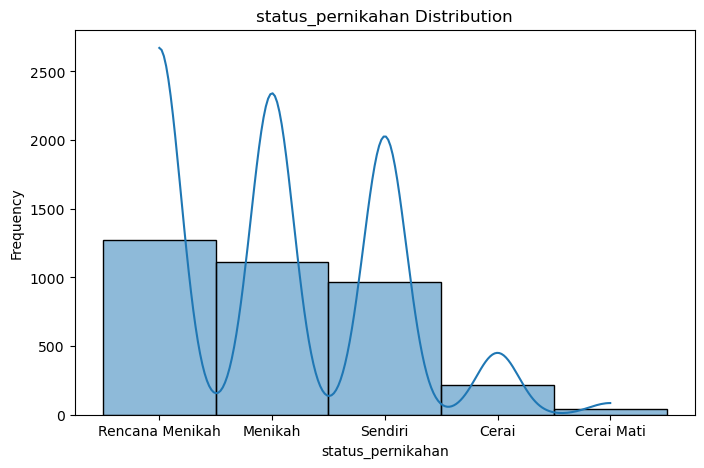

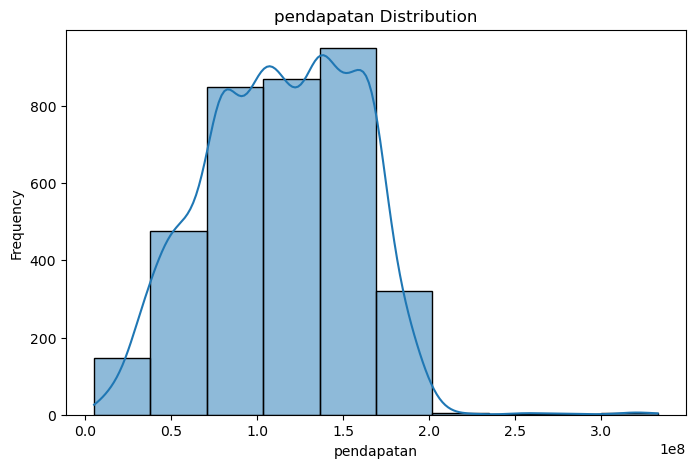

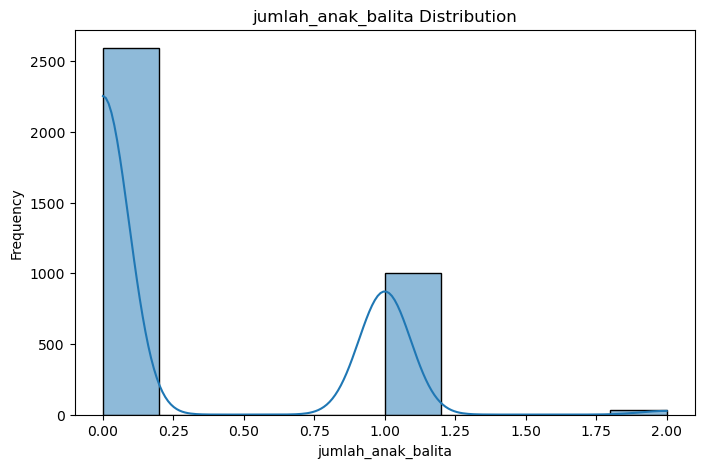

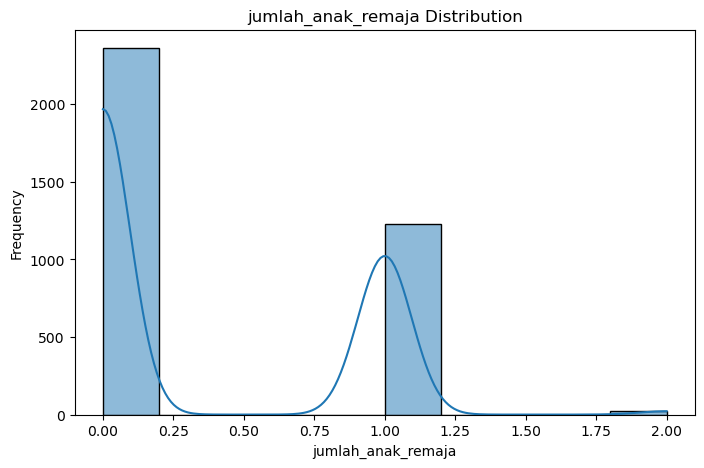

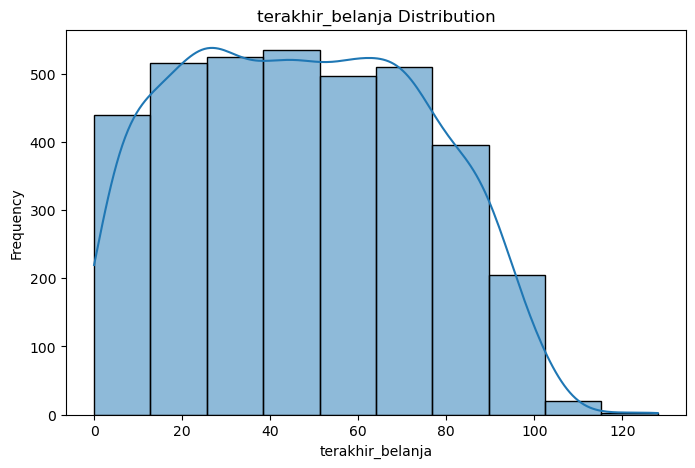

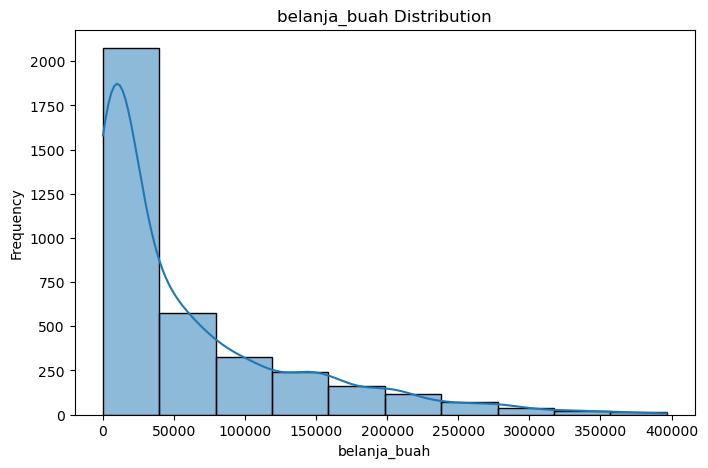

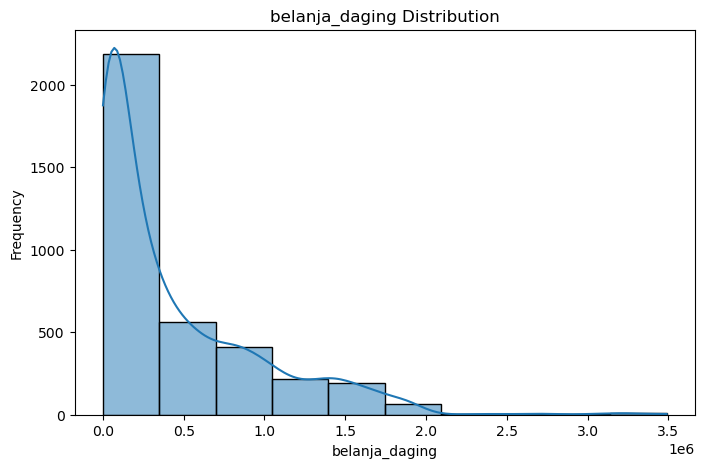

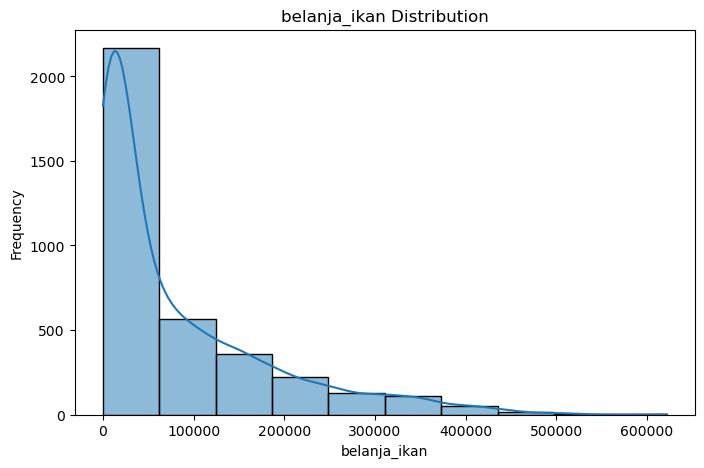

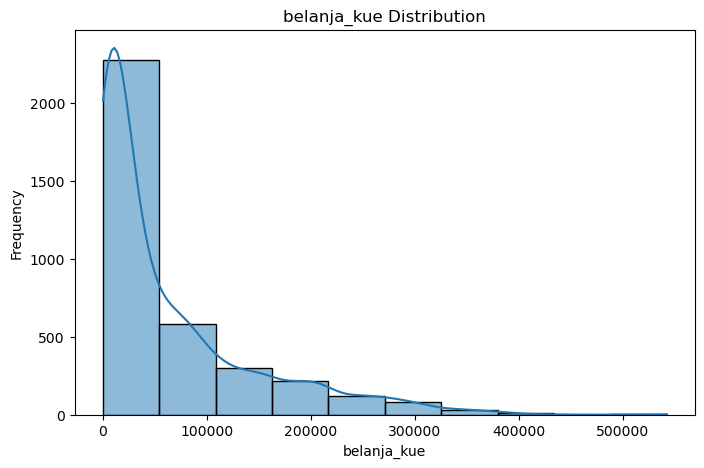

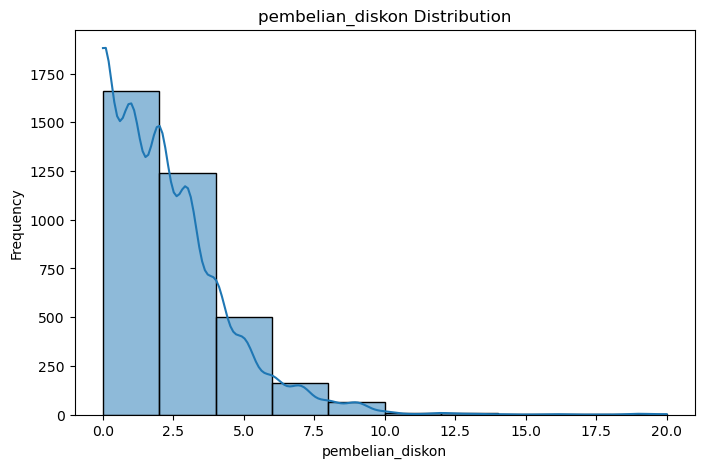

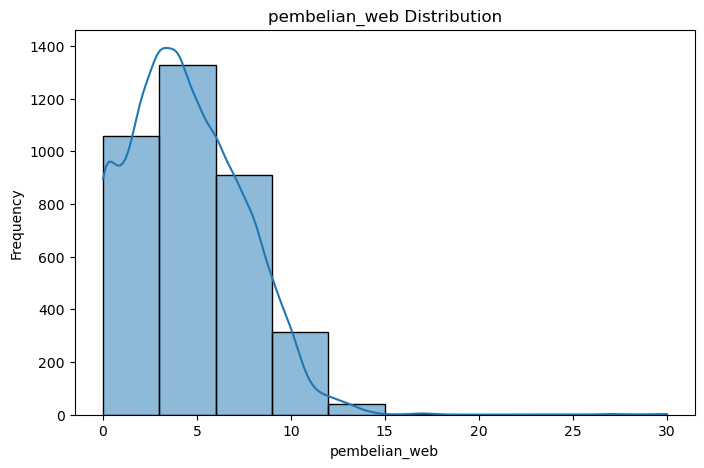

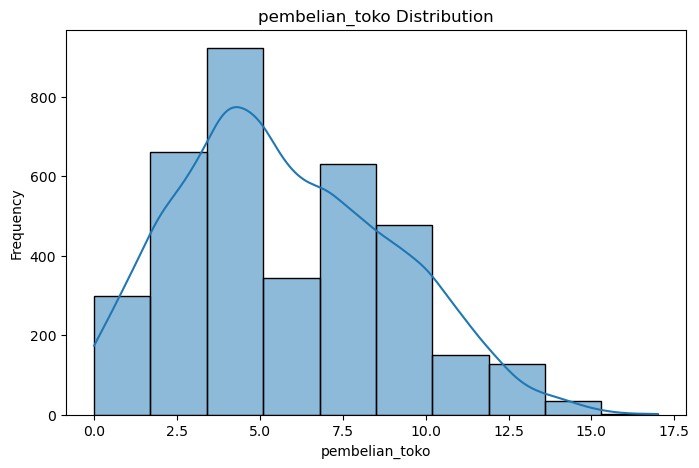

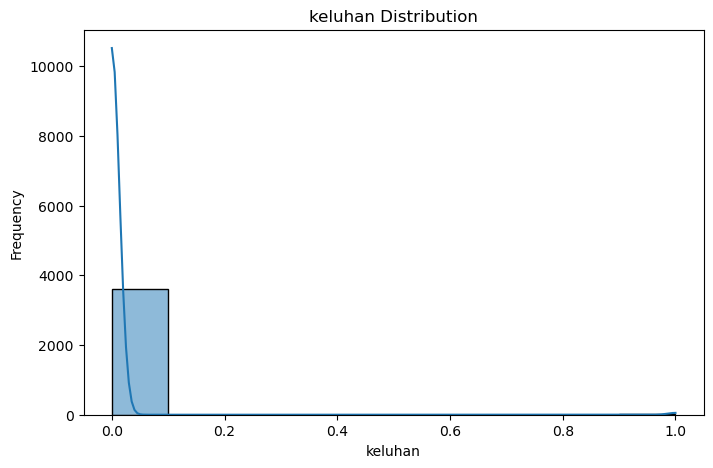

In [34]:
for col in train:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[col], bins=10, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show();

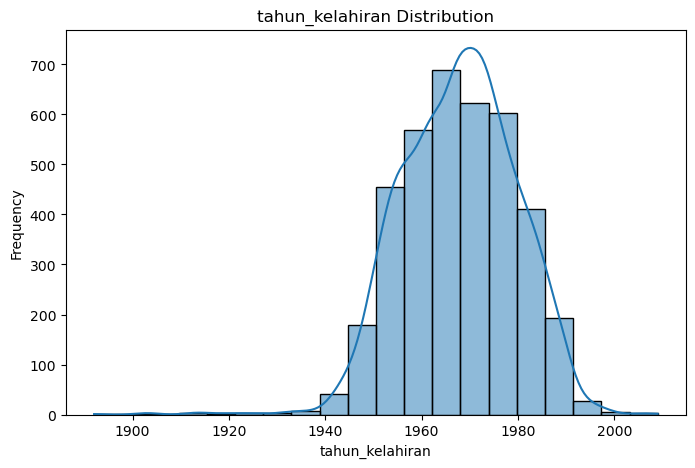

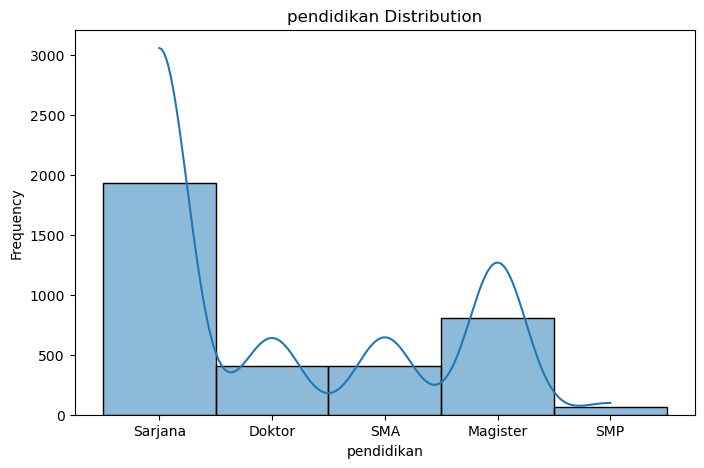

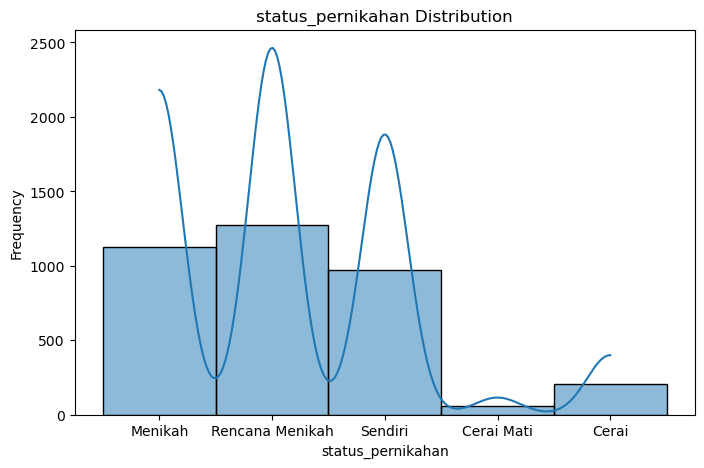

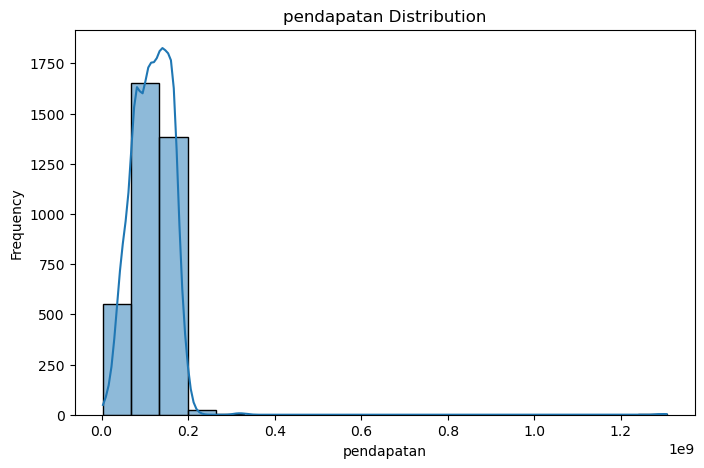

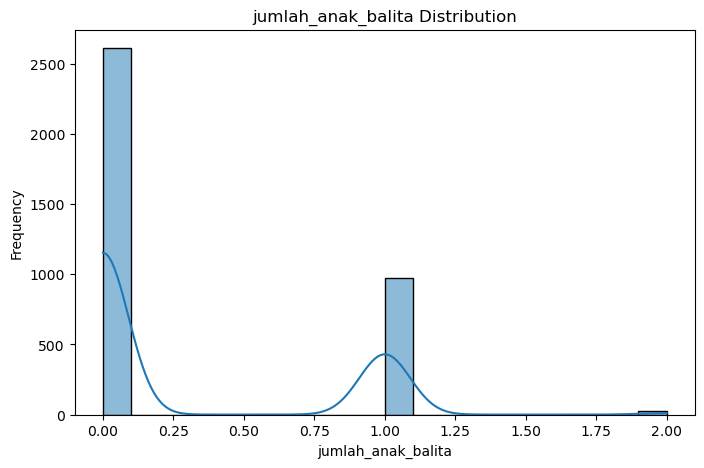

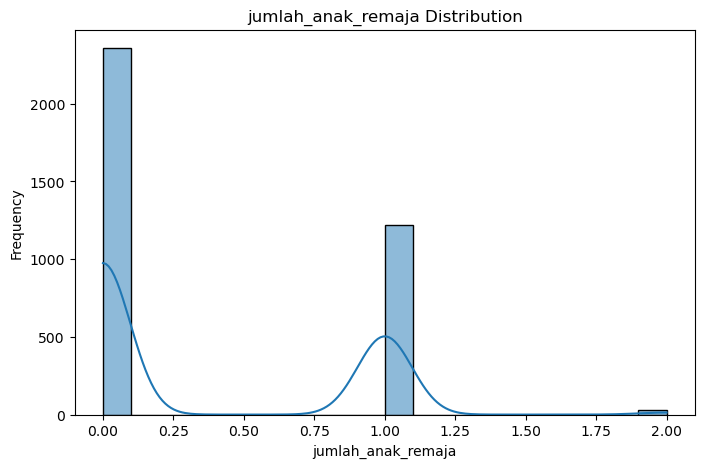

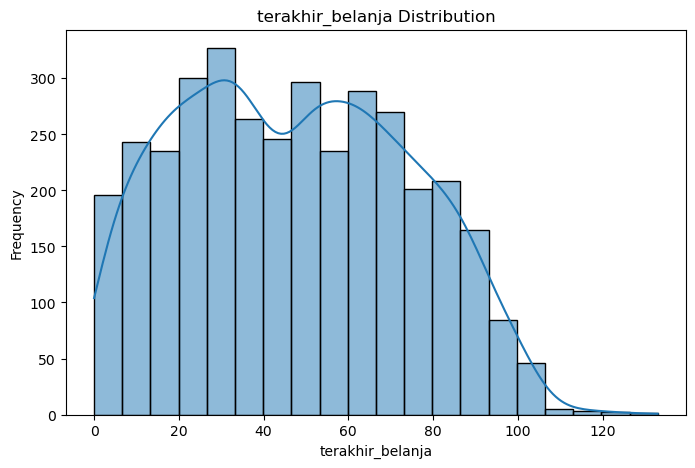

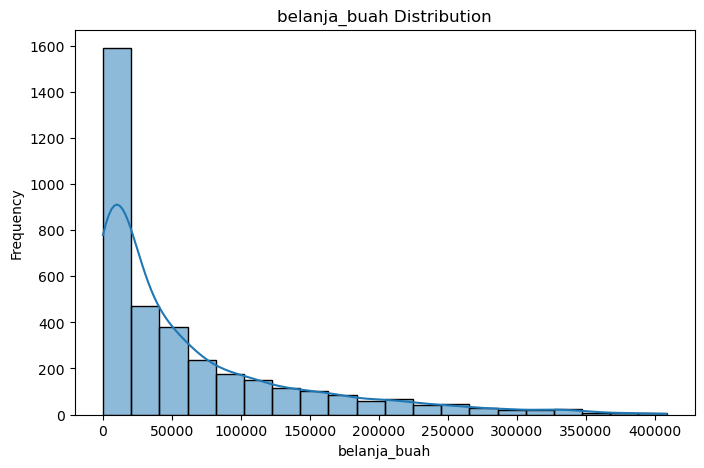

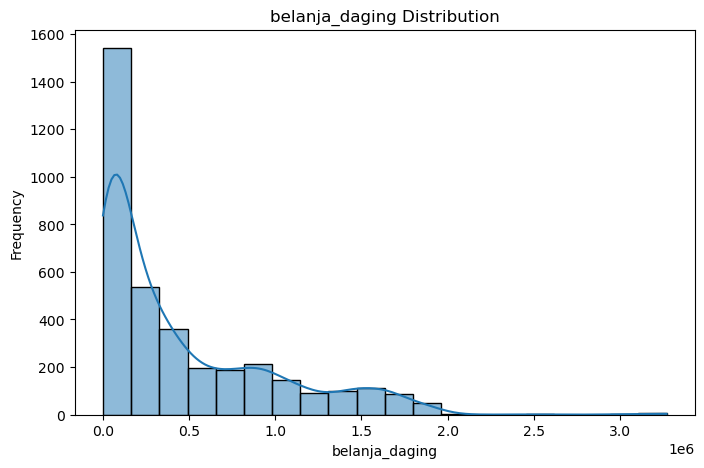

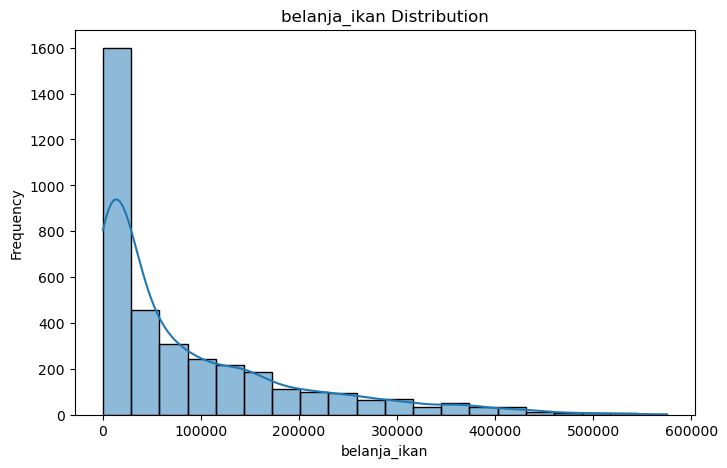

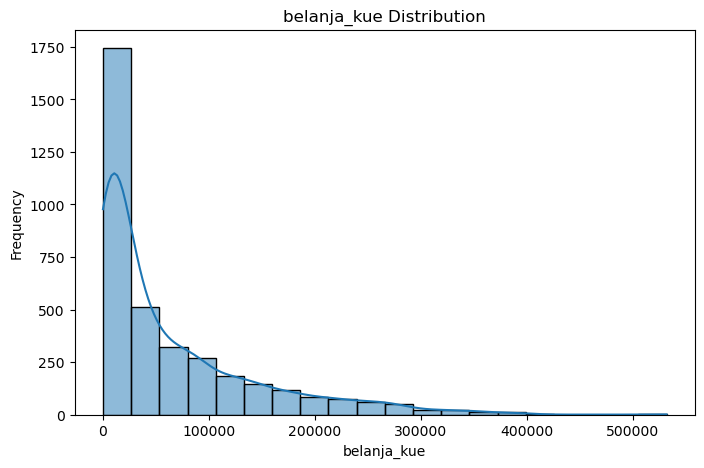

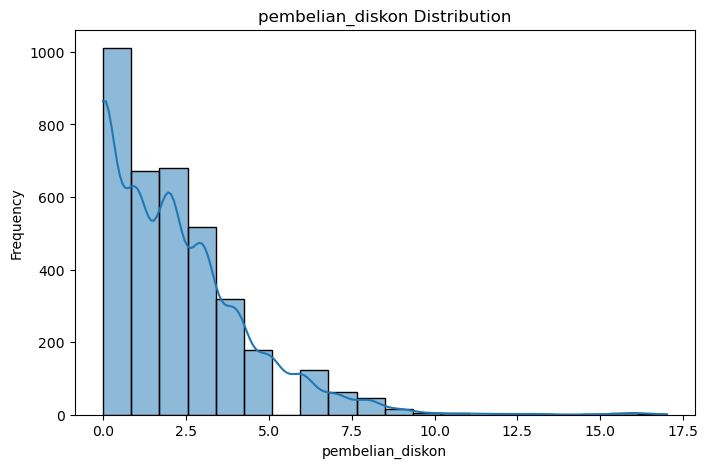

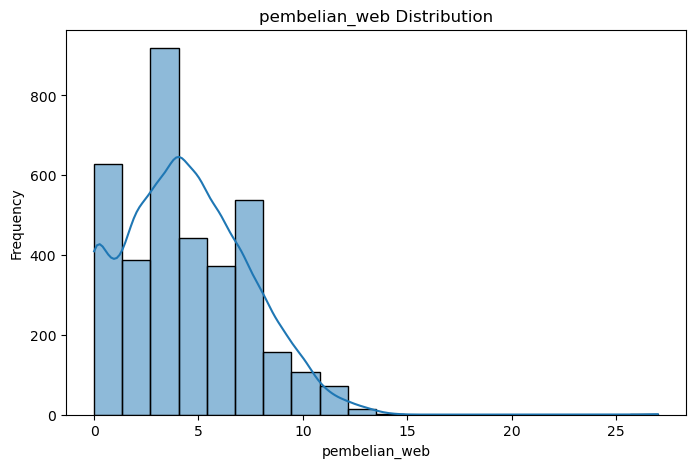

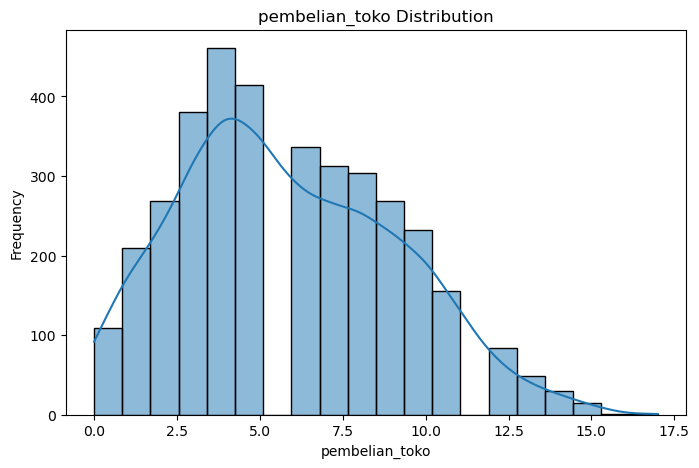

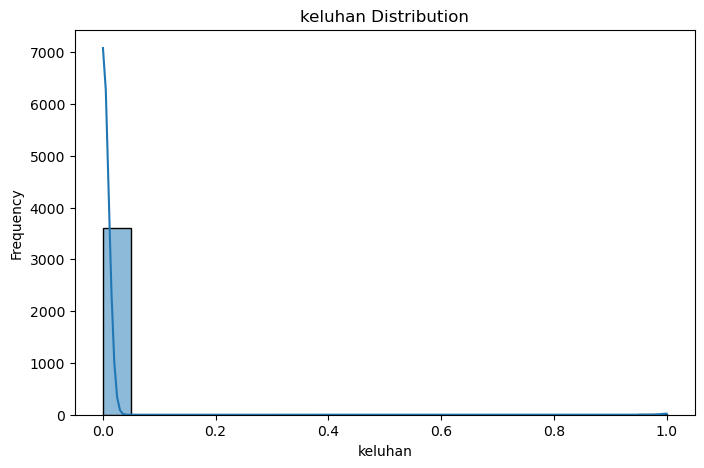

In [29]:
for col in test:
    plt.figure(figsize=(8, 5))
    sns.histplot(test[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show();

### Analisis 1

Selanjutnya berdasarkan persebaran grafik yang didapatkan terkhusus pada kolom belanja untuk setiap pembelian didapatkan bahwa grafik dan cenderung mengalami penurunan seiring peningkatan jumlah cenderung skew right sehingga saat membuat fitur dapat dibuat sebuah analisis dengan mendapatkan persentase dari grafik belanja dengan pendapatan untuk mendapatkan persentase setiap individu dan dilakukan proses modeling

### Analisis 2

Berdasarkan grafik dapat ditinjau bahwa pendapatan cenderung mengalami dan mengarah pada distribusi Normal sehingga dapat dilakukan analisis lebih lanjut, terutama hubungannya pada jumlah pembelian berupa dari pembelian dilakukan secara daring maupun luring 

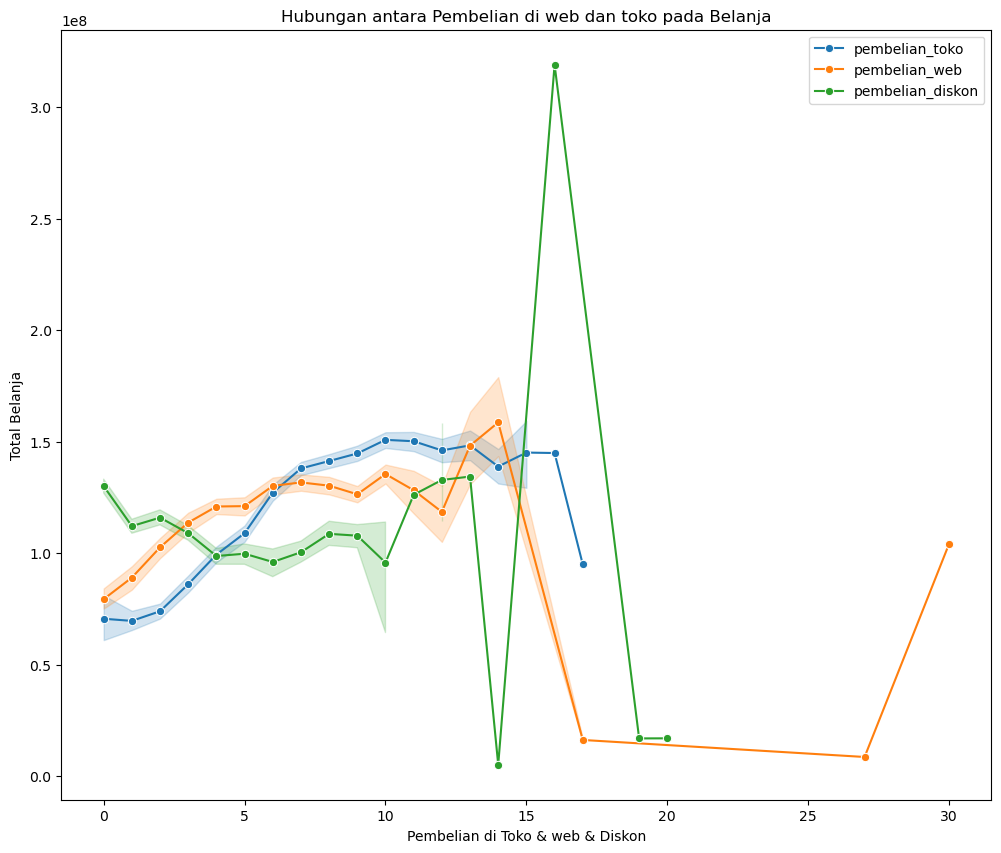

In [53]:
tempat_belanja = ['pembelian_toko','pembelian_web','pembelian_diskon']

fig, ax = plt.subplots(figsize=(12, 10))
for belanja in tempat_belanja:
    sns.lineplot(x=belanja, y='pendapatan', data=train, ax=ax, marker='o', label=belanja)

ax.set_title('Hubungan antara Pembelian di web dan toko pada Belanja')
ax.set_xlabel('Pembelian di Toko & web & Diskon')
ax.set_ylabel('Total Belanja')
plt.legend()  
plt.show()

### Analisis 3
Berdasarkan Analisis menunjukkan bahwa ada korelasi positif antara pendapatan dan frekuensi pembelian langsung ke toko, menandakan bahwa individu dengan pendapatan lebih tinggi cenderung melakukan pembelian lebih sering secara langsung. Rentang kelas pendapatan antara 15 hingga 20 menunjukkan pola pembelian yang paling menonjol, menyarankan adanya korelasi positif yang kuat antara tren ini dan pendapatan. Selain itu, pembelian langsung ke toko dan melalui web berkorelasi positif dengan pendapatan, sementara pembelian dengan diskon tidak menunjukkan tren sekuat pembelian lainnya, mengindikasikan bahwa tidak semua pembelian dilakukan dengan diskon dan mungkin terjadi hanya pada kesempatan tertentu.

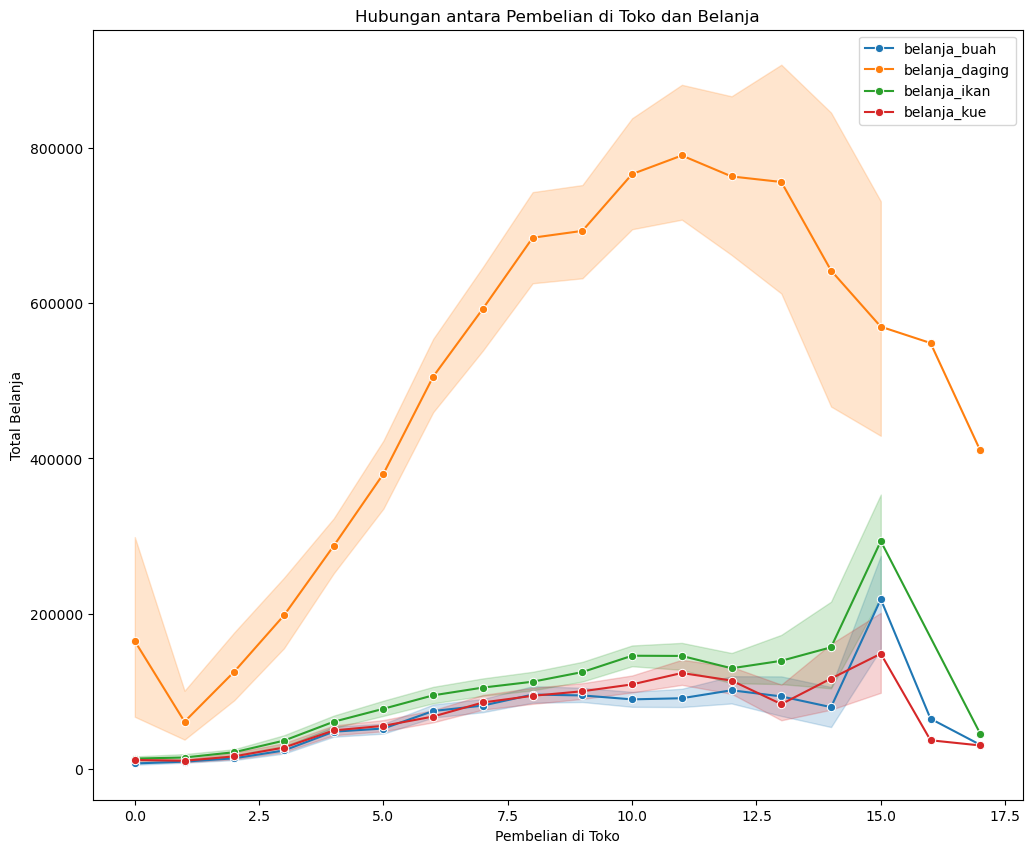

In [44]:
kolom_belanja = ['belanja_buah','belanja_daging', 'belanja_ikan', 'belanja_kue']

fig, ax = plt.subplots(figsize=(12, 10))
for belanja in kolom_belanja:
    sns.lineplot(x='pembelian_toko', y=belanja, data=train, ax=ax, marker='o', label=belanja)

ax.set_title('Hubungan antara Pembelian di Toko dan Belanja')
ax.set_xlabel('Pembelian di Toko')
ax.set_ylabel('Total Belanja')
plt.legend()  
plt.show()

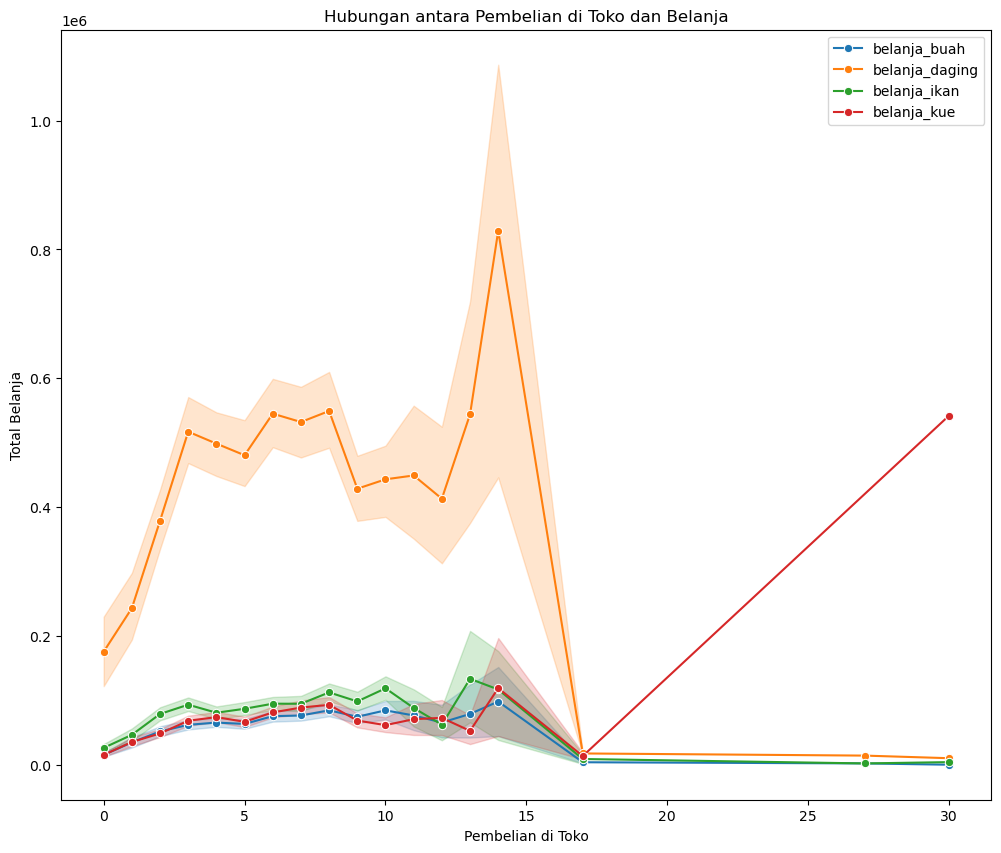

In [46]:
kolom_belanja = ['belanja_buah','belanja_daging', 'belanja_ikan', 'belanja_kue']

fig, ax = plt.subplots(figsize=(12, 10))
for belanja in kolom_belanja:
    sns.lineplot(x='pembelian_web', y=belanja, data=train, ax=ax, marker='o', label=belanja)

ax.set_title('Hubungan antara Pembelian di Toko dan Belanja')
ax.set_xlabel('Pembelian di Toko')
ax.set_ylabel('Total Belanja')
plt.legend()  
plt.show()

### Analisis 4
Pada analisis tren antara pembelian di Toko dan di web terhadap pengeluaran pelanggan pada belanja daging, ikan, buah dan kue yang ternyata menunjukkan tren positif dan hampir memberikan korelasi peningkatan yang sebandng pada pendapatan, Jika di perhatikan lebih lanjut ternyata tren yang positif diberikan oleh pengeluaran belanja pada kelas 15-20 yang berarti hal ini selaras pada kolom pendapatan, sehingga dapat dibuat ditinjau lebih lanjut terkait korelasi da fitur yang dapat dibuat dari analisis diatas.

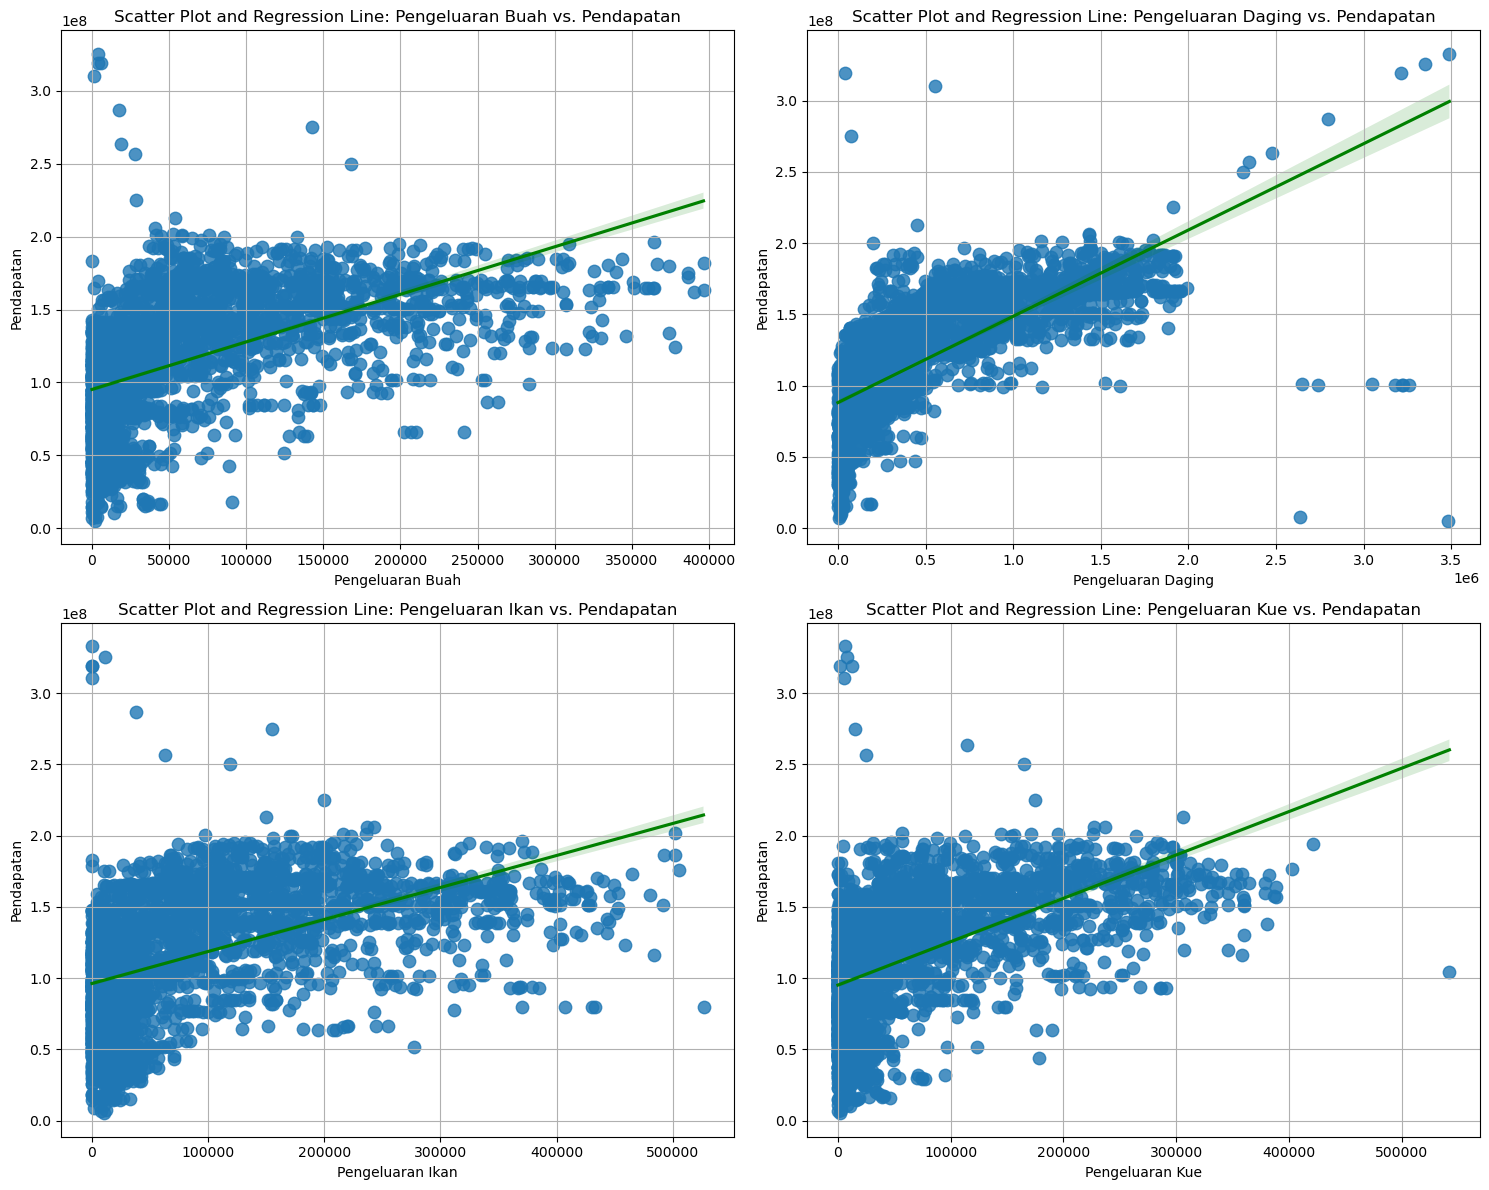

In [51]:
atribut_belanja = ['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']

fig, axes = plt.subplots(2, 2, figsize=(15, 12)) 
axes = axes.flatten()  

for i, belanja in enumerate(atribut_belanja):
    sns.regplot(x=belanja, y='pendapatan', data=train, ax=axes[i], scatter_kws={'s': 80}, line_kws={'color': 'green'})
    axes[i].set_xlabel('Pengeluaran ' + belanja.split('_')[1].capitalize())  # Menyertakan nama belanja di label sumbu x
    axes[i].set_ylabel('Pendapatan')
    axes[i].set_title('Scatter Plot and Regression Line: Pengeluaran {} vs. Pendapatan'.format(belanja.split('_')[1].capitalize()))
    axes[i].grid(True)

plt.tight_layout()  
plt.show()

### Analisis 5
Berdasarkan analisis scatter plot untuk melihat persebaran dari Pengeluaran belanja dengan pendapatan didapatkan korelasi positif dan menunjukka tren, dengan pola statistik bahwa persebaran skew right dan menunjukkan korelasi positif maka bisa dibuat sebuah Feature untuk meninjau Total spend yang dilakukan setiap customer

# Feature Creation

In [56]:
def hitung_rata_buah_ratio(df):
    """Menghitung rata-rata dari rasio belanja buah terhadap pendapatan."""
    ratios = df['belanja_buah'] / df['pendapatan']
    rata_rata_ratio = ratios.mean()
    return rata_rata_ratio
rata_rata_buah = hitung_rata_buah_ratio(train)

def hitung_rata_daging_ratio(df):
    """Menghitung rata-rata dari rasio belanja buah terhadap pendapatan."""
    # Menghitung rasio belanja buah terhadap pendapatan untuk setiap baris
    ratios = df['belanja_daging'] / df['pendapatan']
    # Menghitung rata-rata dari rasio tersebut
    rata_rata_ratio = ratios.mean()
    return rata_rata_ratio
rata_rata_daging = hitung_rata_daging_ratio(train)

def hitung_rata_ikan_ratio(df):
    """Menghitung rata-rata dari rasio belanja buah terhadap pendapatan."""
    # Menghitung rasio belanja buah terhadap pendapatan untuk setiap baris
    ratios = df['belanja_ikan'] / df['pendapatan']
    # Menghitung rata-rata dari rasio tersebut
    rata_rata_ratio = ratios.mean()
    return rata_rata_ratio
rata_rata_ikan = hitung_rata_ikan_ratio(train)

def hitung_rata_kue_ratio(df):
    """Menghitung rata-rata dari rasio belanja buah terhadap pendapatan."""
    # Menghitung rasio belanja buah terhadap pendapatan untuk setiap baris
    ratios = df['belanja_kue'] / df['pendapatan']
    # Menghitung rata-rata dari rasio tersebut
    rata_rata_ratio = ratios.mean()
    return rata_rata_ratio
rata_rata_kue = hitung_rata_kue_ratio(train)

def calculate_total_spend2(X: pd.DataFrame) -> pd.DataFrame:
    X['Total_Spend2'] = X['pendapatan']*rata_rata_buah + X['pendapatan']*rata_rata_daging + X['pendapatan']*rata_rata_ikan + X['pendapatan']*rata_rata_kue
    return X

def pendapatan_qcut(df):
    """Membagi data menjadi beberapa kategori berdasarkan quantile."""
    # Menghitung quantile dari kolom 'pendapatan'
    df['pendapatan_qcut'] = pd.qcut(df['pendapatan'], q=6, labels=False)
    return df

def feature_square_transformation(X: pd.DataFrame) -> pd.DataFrame:
    """Apply log transformation to specified columns."""
    X['Total_Spend2_2'] = X['Total_Spend2']**2
    X['Total_Spend2_3'] = X['Total_Spend2']**3
    X['pendapatan_2'] = X['pendapatan']**2
    X['pendapatan_3'] = X['pendapatan']**3
    return X

def apply_feature_engineering(X: pd.DataFrame) -> pd.DataFrame:
    X = calculate_total_spend2(X)
    X = pendapatan_qcut(X)
    X = feature_square_transformation(X)
    return X

Setelah fungsi dibuat, kita bisa meng-applynya ke data train dan juga test

In [57]:
train_encoded = manual_label_encoding(train.copy())
test_encoded = manual_label_encoding(test.copy())

imputer_reg = IterativeImputer(estimator=DecisionTreeRegressor(random_state=42), max_iter=10, random_state=42, tol=1e-4, initial_strategy='median')
imputer_clf = IterativeImputer(estimator=DecisionTreeClassifier(random_state=42), max_iter=10, random_state=42, tol=1e-4, initial_strategy='most_frequent')
train_imputed = feature_imputation(train_encoded, categorical_features=['pendidikan', 'status_pernikahan'], imputer_reg=imputer_reg, imputer_clf=imputer_clf)
test_imputed = feature_imputation(test_encoded, categorical_features=['pendidikan', 'status_pernikahan'], test=True, imputer_reg=imputer_reg, imputer_clf=imputer_clf)

train = apply_feature_engineering(train_imputed)
test = apply_feature_engineering(test_imputed)

train = one_hot_encoding(train)
test = one_hot_encoding(test, test=True)

# Transformation & Scalling

In [58]:
# Cek outlier dengan IQR
def check_outliers_iqr(df,col):
    col_Q1 = df[col].quantile(0.25)
    col_Q3 = df[col].quantile(0.75)
    col_IQR = col_Q3 - col_Q1
    col_RLB = col_Q1 - 1.5 * col_IQR
    col_RUB = col_Q3 + 1.5 * col_IQR
    outliers = len(df.loc[(df[col]>col_RUB) | (df[col]<col_RLB)])
    return outliers/len(df)*100

In [59]:
for i in ['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pendapatan', 'pendapatan_2', 'Total_Spend2_2', 'Total_Spend2_3', 'pendapatan_3', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko']:
    print(f'Outliers for {i}: {check_outliers_iqr(train,i)}%')
    print(f'Data skew for {i}: {train[i].skew()}')

Outliers for belanja_buah: 6.235263295782028%
Data skew for belanja_buah: 1.6922015347205581
Outliers for belanja_daging: 3.484411841760545%
Data skew for belanja_daging: 1.59612785525357
Outliers for belanja_ikan: 5.973277443018077%
Data skew for belanja_ikan: 1.6348837047710614
Outliers for belanja_kue: 7.047419439350275%
Data skew for belanja_kue: 1.7187039049495345
Outliers for pendapatan: 0.23578726748755569%
Data skew for pendapatan: -0.01307900545991304
Outliers for pendapatan_2: 0.2881844380403458%
Data skew for pendapatan_2: 1.362402292759459
Outliers for Total_Spend2_2: 0.2881844380403458%
Data skew for Total_Spend2_2: 1.3624022927594588
Outliers for Total_Spend2_3: 0.6287660466334818%
Data skew for Total_Spend2_3: 4.709734549923946
Outliers for pendapatan_3: 0.6287660466334818%
Data skew for pendapatan_3: 4.7097345499239465
Outliers for pembelian_diskon: 2.174482577940791%
Data skew for pembelian_diskon: 1.6826844738803435
Outliers for pembelian_web: 0.10479434110558031%
Dat

In [60]:
for i in ['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pendapatan', 'pendapatan_2', 'Total_Spend2_2', 'Total_Spend2_3', 'pendapatan_3', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko']:
    print(f'Outliers for {i}: {check_outliers_iqr(test,i)}%')
    print(f'Data skew for {i}: {test[i].skew()}')

Outliers for belanja_buah: 7.1241487689889995%
Data skew for belanja_buah: 1.791947874520256
Outliers for belanja_daging: 2.1739130434782608%
Data skew for belanja_daging: 1.414677846155723
Outliers for belanja_ikan: 5.395495023572551%
Data skew for belanja_ikan: 1.6163158650581655
Outliers for belanja_kue: 6.6526977475117866%
Data skew for belanja_kue: 1.6846792423236625
Outliers for pendapatan: 0.18334206390780514%
Data skew for pendapatan: 6.5458234486978375
Outliers for pendapatan_2: 0.26191723415400736%
Data skew for pendapatan_2: 39.440396554575216
Outliers for Total_Spend2_2: 0.26191723415400736%
Data skew for Total_Spend2_2: 39.44039655457519
Outliers for Total_Spend2_3: 0.7857517024620221%
Data skew for Total_Spend2_3: 43.57927057196742
Outliers for pendapatan_3: 0.7857517024620221%
Data skew for pendapatan_3: 43.5792705719674
Outliers for pembelian_diskon: 2.1477213200628604%
Data skew for pembelian_diskon: 1.5255628003204214
Outliers for pembelian_web: 0.41906757464641176%
D

dari EDA singkat yang dilakukan didapat, bahwa fitur mengalami skew sehingga akan ditransformasi dengan log1p karena terdapat 0 dan right skew dan discaling dengan menggunakan RobustScaler karena terlihat ada data yang 0, meskipun sedikit, masih ada outlier, terutama banyak 0. Kemudian kolom keluhan akan di drop karena sangat imbalance dan juga memiliki korelasi rendah

In [61]:
def feature_log_transformation(X: pd.DataFrame) -> pd.DataFrame:
    """Apply log transformation to specified columns."""
    X['Total_Spend2'] = np.log1p(X['Total_Spend2'])
    X['belanja_buah'] = np.log1p(X['belanja_buah'])
    X['belanja_daging'] = np.log1p(X['belanja_daging'])
    X['belanja_ikan'] = np.log1p(X['belanja_ikan'])
    X['belanja_kue'] = np.log1p(X['belanja_kue'])
    X['pendapatan'] = np.log1p(X['pendapatan'])
    return X

train = train.drop(columns=['keluhan'])
test = test.drop(columns=['keluhan']) 

train = feature_log_transformation(train)
test = feature_log_transformation(test)

In [62]:
# scaling
scaler = RobustScaler()

col_to_scale = ['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pendapatan', 'Total_Spend2', 'pendapatan_2', 'Total_Spend2_2', 'Total_Spend2_3', 'pendapatan_3']

for i in col_to_scale:
    train[i] = scaler.fit_transform(train[[i]])
    test[i] = scaler.transform(test[[i]])

## Modeling

Disini kita akan menggunakan berbagai model, mulai dari boosting, tree dan lainnya

In [ ]:
# Create the model
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=False)
lr = LogisticRegression(random_state=42)
lgbm = LGBMClassifier(random_state=42, verbose_eval = False, verbose= -100)
et = ExtraTreesClassifier(random_state=42)
bc = BaggingClassifier(random_state=42)
hgbc = HistGradientBoostingClassifier(random_state=42)
ovr = OneVsRestClassifier(estimator=LogisticRegression(random_state=42))
dt = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
ridge = RidgeClassifier(random_state=42)
svc = SVC(random_state=42)
gnb = GaussianNB()
lasso = LassoCV(random_state=42)
mlp = MLPClassifier(random_state=42)
mnb = MultinomialNB()
perceptron = Perceptron(random_state=42)

In [ ]:
# Split the data
X = train
y = train_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)
lr.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
dt.fit(X_train, y_train)
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
et.fit(X_train, y_train)
bc.fit(X_train, y_train)
knn.fit(X_train, y_train)
ridge.fit(X_train, y_train)
hgbc.fit(X_train, y_train)
svc.fit(X_train, y_train)
gnb.fit(X_train, y_train)
lasso.fit(X_train, y_train)
mlp.fit(X_train, y_train)
ovr.fit(X_train, y_train)
perceptron.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [ ]:
# Import the evaluation metrics
from sklearn.metrics import classification_report

# Make predictions
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
cat_pred = cat.predict(X_test)
lr_pred = lr.predict(X_test)
lgbm_pred = lgbm.predict(X_test)
dt_pred = dt.predict(X_test)
ada_pred = ada.predict(X_test)
gb_pred = gb.predict(X_test)
et_pred = et.predict(X_test)
bc_pred = bc.predict(X_test)
knn_pred = knn.predict(X_test)
ridge_pred = ridge.predict(X_test)
hgbc_pred = hgbc.predict(X_test)
svc_pred = svc.predict(X_test)
gnb_pred = gnb.predict(X_test)
lasso_pred = lasso.predict(X_test)
mlp_pred = mlp.predict(X_test)
ovr_pred = ovr.predict(X_test)
perceptron_pred = perceptron.predict(X_test)

# Print classification report for each model
print("Random Forest Classifier")
print(classification_report(y_test, rf_pred))
print()
print("XGBoost Classifier")
print(classification_report(y_test, xgb_pred))
print()
print("CatBoost Classifier")
print(classification_report(y_test, cat_pred))
print()
print("Logistic Regression")
print(classification_report(y_test, lr_pred))
print()
print("LGBM Classifier")
print(classification_report(y_test, lgbm_pred))
print()
print("Decision Tree Classifier")
print(classification_report(y_test, dt_pred))
print()
print("AdaBoost Classifier")
print(classification_report(y_test, ada_pred))
print()
print("Gradient Boosting Classifier")
print(classification_report(y_test, gb_pred))
print()
print("Extra Trees Classifier")
print(classification_report(y_test, et_pred))
print()
print("Bagging Classifier")
print(classification_report(y_test, bc_pred))
print()
print("KNeighbors Classifier")
print(classification_report(y_test, knn_pred))
print()
print("Ridge Classifier")
print(classification_report(y_test, ridge_pred))
print()
print("Hist Gradient Boosting Classifier")
print(classification_report(y_test, hgbc_pred))
print()
print("SVC")
print(classification_report(y_test, svc_pred))
print()
print("GaussianNB")
print(classification_report(y_test, gnb_pred))
print()
print("LassoCV")
print()
print("MLP Classifier")
print(classification_report(y_test, mlp_pred))
print()
print("MultinomialNB")
print()
print("OneVsRest Classifier")
print(classification_report(y_test, ovr_pred))
print()
print("Perceptron")
print(classification_report(y_test, perceptron_pred))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.63      0.80      0.70       195
           1       0.73      0.45      0.56       120
           2       0.80      0.71      0.75        79
           3       0.90      0.82      0.86        84
           4       0.86      0.99      0.92        91
           5       0.90      0.94      0.92       120
           6       0.84      0.72      0.78        75

    accuracy                           0.77       764
   macro avg       0.81      0.78      0.78       764
weighted avg       0.78      0.77      0.77       764


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.61      0.81      0.70       195
           1       0.60      0.41      0.49       120
           2       0.79      0.63      0.70        79
           3       0.82      0.77      0.80        84
           4       0.85      0.97      0.91        91
           5       0.88      0.88

## Feature Importance

In [ ]:
import pandas as pd

# Dictionary untuk menyimpan feature importance
feature_importances = {}

# RandomForest
feature_importances['RandomForest'] = rf.feature_importances_

# XGBoost
feature_importances['XGBoost'] = xgb.feature_importances_

# CatBoost
# CatBoost memiliki atribut .get_feature_importance() untuk mendapatkan feature importance
feature_importances['CatBoost'] = cat.get_feature_importance()

# LightGBM
feature_importances['LightGBM'] = lgbm.feature_importances_

# ExtraTrees
feature_importances['ExtraTrees'] = et.feature_importances_

# Mengonversi feature importances menjadi DataFrame untuk visualisasi yang lebih baik
feature_importances_df = pd.DataFrame(feature_importances, index=X_train.columns)

# Menampilkan DataFrame
print(feature_importances_df)


                       RandomForest   XGBoost   CatBoost  LightGBM  ExtraTrees
tahun_kelahiran            0.051989  0.025164   9.225908      4617    0.046024
pendapatan                 0.063563  0.042858   4.482571      8599    0.058050
jumlah_anak_balita         0.010804  0.039521   1.687538       450    0.019096
jumlah_anak_remaja         0.014289  0.049486   2.875392       458    0.024531
terakhir_belanja           0.062778  0.027350  11.172427      5493    0.051819
belanja_buah               0.058850  0.023879   7.451469      5172    0.045449
belanja_daging             0.078822  0.032888   6.297204      5407    0.056286
belanja_ikan               0.062195  0.027448   7.744853      5171    0.045296
belanja_kue                0.057212  0.023794   7.531890      4799    0.045494
pembelian_diskon           0.038951  0.027433   6.696999      2287    0.047390
pembelian_web              0.046460  0.032711   7.738611      2789    0.049403
pembelian_toko             0.042559  0.025600   6.23

Dari beberapa model diatas, telah dipilih 7 model yaitu, Random Forest, Catboost, XGBoost, Lightgbm, Hgbc, Bagging dan Extra Tree. Kemudian akan dilakukan stacking dengan harapan gabungan dari 7 model tersebut bisa meningkatkan performa prediksi

## Optuna

karena kita masih melihat adanya kemungkinan improve model, maka kami lakukan optuna untuk tunning model, yaitu xgb, cat, xgb dan hgbc

In [ ]:
import numpy as np
import optuna
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are defined elsewhere in your code.
X = train
y = train_target

train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):    
    # Set up the parameters for XGBoost. Note the change to 'multi:softprob' for multi-class classification
    param = {
        "verbosity": 0,
        "num_class": 7,  # Number of classes
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_discrete_uniform("subsample",0.01,1,0.1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.01, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth",1,10),
        "min_child_weight": trial.suggest_int("min_child_weight",1,10),
        "eta": trial.suggest_loguniform("eta",1e-3,0.1),
        "gamma" : trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    }


    # Create an XGBoost classifier with the specified parameters
    clf = xgb.XGBClassifier(**param)
    clf.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=False, early_stopping_rounds=30)
    
    # Predict and calculate accuracy. Note the use of predict instead of predict_proba
    preds = clf.predict(valid_x)
    f1 = f1_score(valid_y, preds, average='macro')  # 'macro' calculates F1 unbiased by class imbalance.
    return f1

if __name__ == "__main__":
    # Create a study object and optimize the objective function
    print("XGBClassifier")

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=200)

    print("Number of finished trials XGBClassifier: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
    # Hyperparameter importance
    importance = optuna.importance.get_param_importances(study)
    print("Hyperparameter importance: ", importance)


In [ ]:
import numpy as np
import optuna
import catboost as cb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are defined elsewhere in your code.
X = train
y = train_target

train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    
    # Define hyperparameters to tune.
    params = {
          'iterations':trial.suggest_int("iterations", 1000, 2000),
          'learning_rate' : trial.suggest_uniform('learning_rate',0.02,1),
          'depth': trial.suggest_int('depth',1,15),
          'min_child_samples': trial.suggest_int('min_child_samples',1,20),
          'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg',1e-8,100),
          'border_count': trial.suggest_int('border_count',1,255),
           }

    # Initialize and train CatBoostClassifier.
    gbm = cb.CatBoostClassifier(**params)
    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    # Predict and calculate F1 score.
    preds = gbm.predict(valid_x)
    f1 = f1_score(valid_y, preds, average='macro')  # 'macro' calculates F1 unbiased by class imbalance.
    return f1

if __name__ == "__main__":
    # Create a study object and optimize the objective function.
    print("CatBoostClassifier")
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=150)  # Specify the number of trials or a timeout.
    
    print("Number of finished trials CatBoostClassifier: {}".format(len(study.trials)))
    print("Best trial:")
    trial = study.best_trial
    print("  Value: {:.2f}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
    # Hyperparameter importance
    importance = optuna.importance.get_param_importances(study)
    print("Hyperparameter importance: ", importance)


In [ ]:
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train are already defined in your environment

def objective(trial):
    # Split your training data further to create a validation set
    dtrain = lgb.Dataset(train_x, label=train_y)

    # Update the parameter dictionary for multi-class classification
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.1, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.1, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "num_class": 7  # Must specify number of classes
    }

    # Train the LightGBM model
    gbm = lgb.train(param, dtrain, num_boost_round=100, valid_sets=[dtrain])
    
    # Predictions are now probabilities for each class, so convert them to class labels
    preds = gbm.predict(valid_x)
    pred_labels = np.argmax(preds, axis=1)  # Use argmax to convert probabilities to class labels
    
    # Calculate accuracy
    f1 = f1_score(valid_y, pred_labels, average='macro')  # 'macro' calculates F1 unbiased by class imbalance.
    return f1

if __name__ == "__main__":
    print("LightGBMClassifier")
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=200)  # Specify either n_trials or timeout

    print("Number of finished trials LightGBMClassifier: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
    # Hyperparameter importance
    importance = optuna.importance.get_param_importances(study)
    print("Hyperparameter importance: ", importance)


In [ ]:
import numpy as np
from sklearn.experimental import enable_hist_gradient_boosting  # Required for HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import optuna

def objective_hgbc(trial):
    # Defining the parameter space to optimize
    param = {
        "max_iter": trial.suggest_int("max_iter", 1000, 2000),  # Number of boosting stages to perform
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),  # Shrinks the contribution of each tree
        "max_depth": trial.suggest_int("max_depth", 3, 30),  # Maximum depth of the individual regression estimators
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 10, 100),  # Minimum number of samples required to be at a leaf node
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 100),  # Maximum number of leaves
        "l2_regularization": trial.suggest_float("l2_regularization", 1e-6, 1.0),  # L2 regularization term on weights
        "max_bins": trial.suggest_int("max_bins", 10, 255),  # Maximum number of bins to use for binning numeric features
        "tol": trial.suggest_float("tol", 1e-6, 1e-3)  # Tolerance for early stopping
    }

    # Initialize and train the HistGradientBoostingClassifier
    model = HistGradientBoostingClassifier(**param)
    model.fit(train_x, train_y)
    preds = model.predict(valid_x)

    # Evaluate the model using the F1 score with 'macro' averaging
    f1 = f1_score(valid_y, preds, average='macro')
    return f1

# Set up the Optuna study and optimize
if __name__ == "__main__":
    print("HistGradientBoostingClassifier")
    study_hgbc = optuna.create_study(direction='maximize')
    study_hgbc.optimize(objective_hgbc, n_trials=200)  # Customize the number of trials as necessary

    # Displaying results of the best trial
    print("Number of finished trials HistGradientBoostingClassifier: ", len(study_hgbc.trials))
    print("Best trial:")
    best_trial = study_hgbc.best_trial
    print("  Value: {:.3f}".format(best_trial.value))
    print("  Params: ")
    for key, value in best_trial.params.items():
        print(f"    {key}: {value}")
        
    # Hyperparameter importance
    importance = optuna.importance.get_param_importances(study)
    print("Hyperparameter importance: ", importance)


## Stacking

Setelah dilakukan optuna, maka akan dilakukan pembuatan kembali model dan dibuat stacking, dengan base estimator 7 model sebelumnya dan final estimator logistic regression

In [ ]:
hgbc_params = {'max_iter': 1616, 'learning_rate': 0.18687571967162378, 'max_depth': 8, 'min_samples_leaf': 15, 'max_leaf_nodes': 75, 'l2_regularization': 0.12937627476018235, 'max_bins': 129, 'tol': 1.3215592381029932e-06}

lgb_params = {'boosting_type': 'gbdt', 'lambda_l1': 0.0010665816591869254, 'lambda_l2': 5.044551885754109e-07, 'num_leaves': 75, 'feature_fraction': 0.9198256591058415, 'bagging_fraction': 0.9469495075478209, 'bagging_freq': 1, 'min_child_samples': 8}

xgb_params = {
    "lambda": 0.42063684787875844,
    "alpha": 6.786641948578962e-06,
    "subsample": 0.91,
    "colsample_bytree": 0.7361552502252765,
    "learning_rate": 0.1493758531611824,
    "max_depth": 9,
    "min_child_weight": 1,
    "eta": 0.03696117895873014,
    "gamma": 0.2258002455056865
}

# xgb_params = {'lambda': 0.004891724254151424, 'alpha': 0.027223364416559166, 'subsample': 0.91, 'colsample_bytree': 0.5684776239280256, 'learning_rate': 0.194475931699053, 'max_depth': 9, 'min_child_weight': 1, 'eta': 0.05348072826682017, 'gamma': 0.00022542619648088636}

catboost_params = {'iterations': 1341, 'learning_rate': 0.06945795892294081, 'depth': 8, 'min_child_samples': 19, 'l2_leaf_reg': 4.1919572411030933e-08, 'border_count': 77, 'auto_class_weights': 'None'}

# Create the model
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, **xgb_params)
cat = CatBoostClassifier(random_state=42, verbose=False, **catboost_params)
lr = LogisticRegression(random_state=42)
lgbm = LGBMClassifier(random_state=42, **lgb_params, verbose_eval = False, verbose= -100)
et = ExtraTreesClassifier(random_state=42)
bc = BaggingClassifier(random_state=42)
hgbc = HistGradientBoostingClassifier(random_state=42, **hgbc_params)

### Menentukan final estimator

In [ ]:
# Assuming your base models are named rf, cat, lgbm, xgb, hgbc, et and are already trained
# Generate class probabilities for the validation set
probabilities_rf = rf.predict_proba(X_test)
probabilities_cat = cat.predict_proba(X_test)
probabilities_lgbm = lgbm.predict_proba(X_test)
probabilities_xgb = xgb.predict_proba(X_test)
probabilities_hgbc = hgbc.predict_proba(X_test)
probabilities_et = et.predict_proba(X_test)

# Convert probabilities to a DataFrame for each class and compute correlations
columns = [f'Class_{i}' for i in range(7)]
predictions_df_list = []

for i, probs in enumerate([probabilities_rf, probabilities_cat, probabilities_lgbm, probabilities_xgb, probabilities_hgbc, probabilities_et]):
    df = pd.DataFrame(probs, columns=columns)
    df = df.add_prefix(f'Model_{i}_')
    predictions_df_list.append(df)

# Concatenate all DataFrame horizontally
full_predictions_df = pd.concat(predictions_df_list, axis=1)

# Compute the correlation matrix across all models for each class
correlation_matrix = full_predictions_df.corr()
print(correlation_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Base Model Predictions Across Classes')
plt.show()

Dilihat bahwa korelasi antar predict proba cukup tinggi, maka akan dipakai model Logistic Regression untuk final estimator

In [ ]:
# create stacking model from 7 model
estimators = [
    ('rf', rf),
    ('cat', cat),
    ('lgbm', lgbm),
    ('xgb', xgb),
    ('hgbc', hgbc),
    ('et', et),
    ('bc', bc)
]

stack_6 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))

# Train the model
stack_6.fit(X_train, y_train)

# Make predictions
stack_pred_6 = stack_6.predict(X_test)

# Print classification report for each model
print("Stacking Classifier")
print(classification_report(y_test, stack_pred_6))

from sklearn.metrics import f1_score

f1_score(y_test, stack_pred_6, average='macro')
#0.7798020446469242

Stacking Classifier
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       195
           1       0.67      0.55      0.60       120
           2       0.87      0.68      0.77        79
           3       0.91      0.85      0.88        84
           4       0.94      0.98      0.96        91
           5       0.92      0.95      0.93       120
           6       0.92      0.73      0.81        75

    accuracy                           0.80       764
   macro avg       0.84      0.79      0.81       764
weighted avg       0.81      0.80      0.80       764



0.810365587103063

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Misal Anda sudah memiliki y_true dan y_pred
y_true = y_test['jumlah_promosi']# array yang berisi label sebenarnya
y_pred = stack_pred_6.ravel()# array yang berisi prediksi model

# Buat DataFrame dari label sebenarnya dan prediksi
results_df = pd.DataFrame({'True': y_true, 'Predicted': y_pred})

# Identifikasi kasus di mana class 1 salah diprediksi
errors_class_1 = results_df[(results_df['True'] == 1) & (results_df['Predicted'] != 1)]

# Tampilkan kesalahan prediksi
print("Error cases for class 1:")
print(errors_class_1)


In [ ]:
# Tampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

dari hasil diperoleh, bahwa model kurang baik dalam menangkap class 1, kebanyakan malah diprediksi sebagai class 0, hal ini juga merupakan imbas dari imbalanced data

## Submission

In [ ]:
# Model training
stack_6.fit(X, y)

# create submission file
submission = pd.read_csv('/kaggle/input/findit/submission_format.csv')
submission['jumlah_promosi'] = stack_6.predict(test)
submission.to_csv('/kaggle/working/submission15.csv', index=False)
submission.head()

,ID,jumlah_promosi
0,2241,0
1,2274,0
2,1107,1
3,4478,3
4,5080,4
